## MENTAL FITNESS RATE PREDICTION

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATA

In [2]:
df1 = pd.read_csv("Dataset/prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv('Dataset/mental-and-substance-use-as-share-of-disease (1).csv')

In [3]:
df1 = pd.read_csv("Dataset/prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv('Dataset/mental-and-substance-use-as-share-of-disease (1).csv')

In [4]:
df2.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


### DATA PREPROCESSING

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 6   

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [7]:
df1.isnull().sum()

Entity                                                                                0
Code                                                                                690
Year                                                                                  0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)              0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)         0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)       0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)      0
dtype: int64

In [8]:
df2.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [9]:
df1.shape, df2.shape

((6840, 10), (6840, 4))

In [10]:
df1.duplicated().sum()

0

In [11]:
df2.duplicated().sum()

0

In [12]:
df1.dropna(inplace=True)

In [13]:
df2.dropna(inplace=True)

In [14]:
df1.shape, df2.shape

((6150, 10), (6150, 4))

In [15]:
df1['Schizophrenia(%)'] = df1['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)']
df1['Bipolar disorder(%)'] = df1['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)']
df1['Eating disorders(%)'] = df1['Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)']
df1['Anxiety disorders(%)'] = df1['Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)']
df1['Drug use disorders(%)'] = df1['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)']
df1['Depressive disorders(%)'] = df1['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)']
df1['Alcohol use disorders(%)'] = df1['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']

In [16]:
df1_copy = df1[['Entity','Code','Year','Schizophrenia(%)','Bipolar disorder(%)','Eating disorders(%)',
               'Anxiety disorders(%)','Drug use disorders(%)','Depressive disorders(%)','Alcohol use disorders(%)']]

In [17]:
df1_copy

,Entity,Code,Year,Schizophrenia(%),Bipolar disorder(%),Eating disorders(%),Anxiety disorders(%),Drug use disorders(%),Depressive disorders(%),Alcohol use disorders(%)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711


In [18]:
df2['Mental fitness'] = df2['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

In [19]:
df2.drop(columns=['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'], axis=1, inplace=True)

In [20]:
df2

,Entity,Code,Year,Mental fitness
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949


In [21]:
## Merging
df = pd.merge(df1_copy,df2, on=['Entity', 'Code', 'Year'])

In [22]:
df

,Entity,Code,Year,Schizophrenia(%),Bipolar disorder(%),Eating disorders(%),Anxiety disorders(%),Drug use disorders(%),Depressive disorders(%),Alcohol use disorders(%),Mental fitness
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...,...
6145,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6146,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6147,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6148,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    6150 non-null   object 
 1   Code                      6150 non-null   object 
 2   Year                      6150 non-null   int64  
 3   Schizophrenia(%)          6150 non-null   float64
 4   Bipolar disorder(%)       6150 non-null   float64
 5   Eating disorders(%)       6150 non-null   float64
 6   Anxiety disorders(%)      6150 non-null   float64
 7   Drug use disorders(%)     6150 non-null   float64
 8   Depressive disorders(%)   6150 non-null   float64
 9   Alcohol use disorders(%)  6150 non-null   float64
 10  Mental fitness            6150 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 528.6+ KB


In [24]:
df['Entity'].nunique()

205

In [25]:
df['Code'].nunique()

205

### CORRELATION

In [26]:
corr = df.corr(numeric_only=True)

<Axes: >

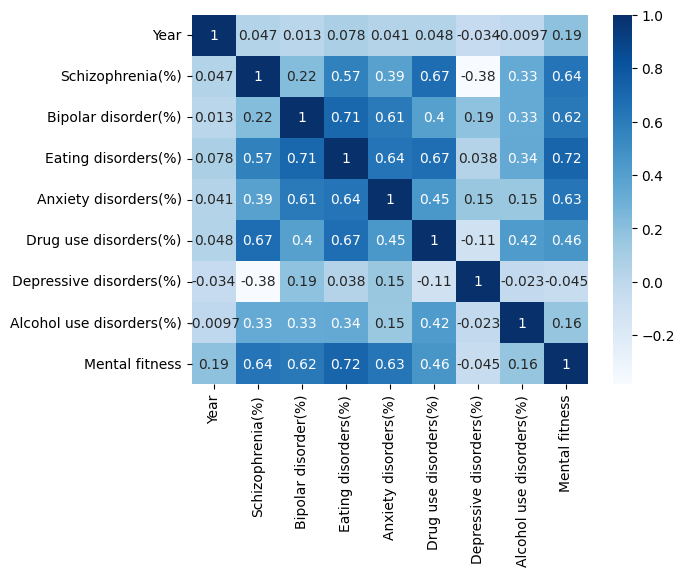

In [27]:
sns.heatmap(corr, annot=True, cmap='Blues')

In [28]:
df['Code'].value_counts().to_dict()

{'AFG': 30,
 'PRY': 30,
 'PRK': 30,
 'MKD': 30,
 'MNP': 30,
 'NOR': 30,
 'OMN': 30,
 'PAK': 30,
 'PLW': 30,
 'PSE': 30,
 'PAN': 30,
 'PNG': 30,
 'PER': 30,
 'NGA': 30,
 'PHL': 30,
 'POL': 30,
 'PRT': 30,
 'PRI': 30,
 'QAT': 30,
 'ROU': 30,
 'RUS': 30,
 'RWA': 30,
 'KNA': 30,
 'LCA': 30,
 'NIU': 30,
 'NER': 30,
 'LUX': 30,
 'MDA': 30,
 'MWI': 30,
 'MYS': 30,
 'MDV': 30,
 'MLI': 30,
 'MLT': 30,
 'MHL': 30,
 'MRT': 30,
 'MUS': 30,
 'MEX': 30,
 'FSM': 30,
 'MCO': 30,
 'NIC': 30,
 'MNG': 30,
 'MNE': 30,
 'MAR': 30,
 'MOZ': 30,
 'MMR': 30,
 'NAM': 30,
 'NRU': 30,
 'NPL': 30,
 'NLD': 30,
 'NZL': 30,
 'VCT': 30,
 'WSM': 30,
 'SMR': 30,
 'ARE': 30,
 'TGO': 30,
 'TKL': 30,
 'TON': 30,
 'TTO': 30,
 'TUN': 30,
 'TUR': 30,
 'TKM': 30,
 'TUV': 30,
 'UGA': 30,
 'UKR': 30,
 'GBR': 30,
 'STP': 30,
 'USA': 30,
 'VIR': 30,
 'URY': 30,
 'UZB': 30,
 'VUT': 30,
 'VEN': 30,
 'VNM': 30,
 'OWID_WRL': 30,
 'YEM': 30,
 'ZMB': 30,
 'TLS': 30,
 'THA': 30,
 'TZA': 30,
 'TJK': 30,
 'SAU': 30,
 'SEN': 30,
 'SRB': 30,

In [29]:
df['Entity'].unique()[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
      dtype=object)

### TARGET ENCODING

In [30]:
mean_target = df.groupby('Entity')['Mental fitness'].mean().round(4)

# Map the mean target values to the 'Entity' column
df['Entity_encoded'] = df['Entity'].map(mean_target)

In [31]:
mean_target_map = dict(zip(df['Entity_encoded'], df['Entity']))

In [32]:
mean_target_map

{2.5531: 'Afghanistan',
 5.2767: 'Albania',
 6.4512: 'Algeria',
 4.5295: 'American Samoa',
 8.9905: 'Andorra',
 2.1007: 'Angola',
 6.4961: 'Antigua and Barbuda',
 5.9511: 'Argentina',
 4.6368: 'Armenia',
 9.563: 'Australia',
 6.8401: 'Austria',
 3.6093: 'Azerbaijan',
 5.6012: 'Bahamas',
 10.9031: 'Bahrain',
 3.9777: 'Bangladesh',
 5.6927: 'Barbados',
 4.2687: 'Belarus',
 6.3106: 'Belgium',
 5.6594: 'Belize',
 1.7226: 'Benin',
 7.2348: 'Bermuda',
 3.7801: 'Bhutan',
 4.2797: 'Bolivia',
 5.0057: 'Bosnia and Herzegovina',
 2.2689: 'Botswana',
 6.6777: 'Brazil',
 6.1557: 'Brunei',
 3.409: 'Bulgaria',
 1.3939: 'Burkina Faso',
 1.7088: 'Burundi',
 2.9998: 'Cambodia',
 1.892: 'Cameroon',
 6.986: 'Canada',
 4.9172: 'Cape Verde',
 1.5039: 'Central African Republic',
 1.3554: 'Chad',
 8.6854: 'Chile',
 4.8842: 'China',
 5.437: 'Colombia',
 2.7553: 'Comoros',
 2.7378: 'Congo',
 4.8587: 'Cook Islands',
 7.7278: 'Costa Rica',
 1.648: "Cote d'Ivoire",
 4.7316: 'Croatia',
 7.4889: 'Cuba',
 8.0335: 'Cy

In [33]:
decoded_country = df['Entity_encoded'].map(mean_target_map)

In [34]:
decoded_country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
6145       Zimbabwe
6146       Zimbabwe
6147       Zimbabwe
6148       Zimbabwe
6149       Zimbabwe
Name: Entity_encoded, Length: 6150, dtype: object

In [35]:
df['Entity_encoded'].nunique()

205

In [36]:
df.drop(columns=['Entity','Code'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      6150 non-null   int64  
 1   Schizophrenia(%)          6150 non-null   float64
 2   Bipolar disorder(%)       6150 non-null   float64
 3   Eating disorders(%)       6150 non-null   float64
 4   Anxiety disorders(%)      6150 non-null   float64
 5   Drug use disorders(%)     6150 non-null   float64
 6   Depressive disorders(%)   6150 non-null   float64
 7   Alcohol use disorders(%)  6150 non-null   float64
 8   Mental fitness            6150 non-null   float64
 9   Entity_encoded            6150 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 480.6 KB


### SPLITTING DATA

In [38]:
x = df.drop(columns=['Mental fitness'], axis=1)
y = df['Mental fitness']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape

((4920, 9), (1230, 9))

### FEATURE SCALING

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [45]:
X_train_sc

array([[ 0.29314933,  0.4955282 , -0.3528099 , ..., -1.38553336,
         0.2211483 ,  0.22591014],
       [ 0.75390955,  0.40154136, -1.26667853, ..., -1.57132579,
        -1.12315495, -0.57512952],
       [-0.05242084,  0.95451349, -1.80164538, ..., -1.26647832,
        -1.11371091,  0.32672155],
       ...,
       [-0.97394129,  0.62980429,  1.52393419, ...,  0.76235066,
         1.82863426,  1.22178037],
       [ 0.63871949, -1.42892269, -0.26512794, ...,  0.80312617,
        -0.14509322, -1.22142187],
       [ 0.63871949, -1.56599687, -0.50425483, ...,  0.46404959,
        -1.07363046, -1.50915445]])

### MODEL BUILDING

In [46]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1.0, 10.0]}
    },
    'Elastic Net Regression': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
    },
    'Polynomial Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [None, 5, 10]}
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
    }
}


### HYPERPARAMETER TUNING

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
scores = []
for model_name, mp in model_params.items():
    gscv = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gscv.fit(X_train_sc, y_train)
    scores.append({
        'model': model_name,
        'score': gscv.best_score_,
        'best_params': gscv.best_params_
    })


In [50]:
df_scores = pd.DataFrame(scores, columns=['model','score','best_params'])
df_scores

,model,score,best_params
0,Linear Regression,0.956012,{}
1,Ridge Regression,0.956012,{'alpha': 1.0}
2,Lasso Regression,0.952367,{'alpha': 0.1}
3,Elastic Net Regression,0.951815,"{'alpha': 0.1, 'l1_ratio': 0.8}"
4,Polynomial Regression,0.956012,{}
5,Decision Tree Regression,0.989170,{'max_depth': None}
6,Random Forest Regression,0.993748,"{'max_depth': None, 'n_estimators': 100}"
7,Gradient Boosting Regression,0.981719,"{'learning_rate': 0.1, 'n_estimators': 200}"


### TRAINING

In [51]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train_sc, y_train)

RandomForestRegressor(n_estimators=200)

In [52]:
y_pred = model.predict(X_test_sc)

In [53]:
y_test[:5]

2798    2.071537
6132    1.273044
5239    7.854589
4775    4.029900
4986    1.317210
Name: Mental fitness, dtype: float64

In [54]:
y_pred[:5]

array([2.12508222, 1.30304965, 7.84316199, 4.0251111 , 1.30801107])

### MODEL EVALUATION

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.02199309553666725
Root Mean Squared Error (RMSE): 0.14830069297433254
Mean Absolute Error (MAE): 0.08041432008068283
R-squared (R2) Score: 0.996108072853627


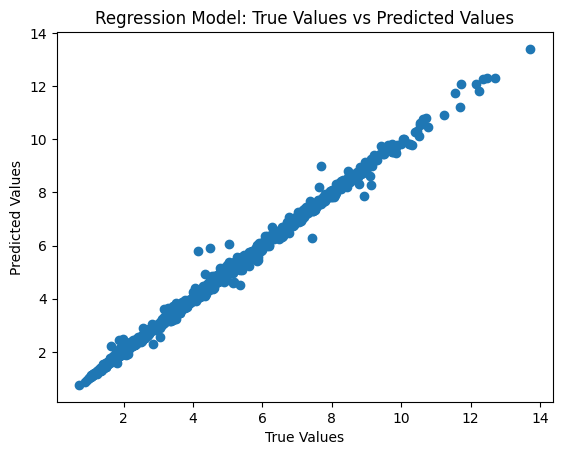

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Model: True Values vs Predicted Values")
plt.show()

### MODEL SAVING

In [59]:
import pickle

In [60]:
# with open('model.h5', 'wb') as f:
#     pickle.dump(model,f)

In [61]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model,f)

In [62]:
with open('model.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

In [63]:
X_train.iloc[0]

Year                        2007.000000
Schizophrenia(%)               0.301691
Bipolar disorder(%)            0.577711
Eating disorders(%)            0.124211
Anxiety disorders(%)           3.972725
Drug use disorders(%)          0.465725
Depressive disorders(%)        2.622425
Alcohol use disorders(%)       1.736143
Entity_encoded                 5.276700
Name: 47, dtype: float64

In [64]:
y_train.iloc[0]

5.85413746815657

### SAVING FEATURE SCALER & ENCODED COUNTRY FOR FUTURE PROCESSING

In [ ]:
# with open('decoded_country.pkl', 'wb') as f:
#     pickle.dump(decoded_country_map, f)

In [ ]:
# with open('scaling.pkl', 'wb') as f:
#     pickle.dump(sc, f)

### MODEL TESTING

In [65]:
ip = [2007, 3.01691157e-01, 5.77711225e-01, 1.24211420e-01,
       3.97272478e+00, 4.65725485e-01, 2.62242482e+00, 1.73614324e+00,
       'Albania']

In [66]:
ip_df = pd.DataFrame(data=np.array([ip]), columns=X_train.columns)
ip_df

,Year,Schizophrenia(%),Bipolar disorder(%),Eating disorders(%),Anxiety disorders(%),Drug use disorders(%),Depressive disorders(%),Alcohol use disorders(%),Entity_encoded
0,2007,0.301691157,0.577711225,0.12421142,3.97272478,0.465725485,2.62242482,1.73614324,Albania


In [90]:
country = ip_df['Entity_encoded'][0]

In [92]:
ip_df['Entity_encoded'] = decode[country]

In [78]:
with open('decoded_country.pkl', 'rb') as f:
    decode = pickle.load(f)

In [80]:
with open('scaling.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [96]:
ip_sc = sc.transform(ip_df)

In [97]:
ip_sc

array([[ 0.29314933,  0.49552821, -0.35280989, -0.53387805, -0.27681672,
        -0.58777924, -1.38553336,  0.2211483 ,  0.22591014]])

### PREDICTION

In [98]:
op = model_loaded.predict(ip_sc)
op

array([5.79953933])

### RESULT

In [99]:
def categorize_mental_fitness(rate):
    if rate <= 4:
        return 'Low'
    elif rate <= 9:
        return 'Moderate'
    else:
        return 'High'

def get_category_details(category):
    if category == 'Low':
        return "Your predicted mental fitness rate is low. It's important to prioritize your mental well-being and seek professional help. Consider consulting with a mental health professional or therapist for guidance and support. Focus on self-care activities, engage in hobbies that bring you joy, and maintain a strong support network."
    elif category == 'Moderate':
        return "Your predicted mental fitness rate is moderate. Continue to pay attention to your mental well-being and consider engaging in activities that promote positive mental health. Explore mindfulness exercises, practice self-reflection, and seek support from loved ones or support groups. Consider consulting with a mental health professional if needed."
    else:
        return "Congratulations! Your predicted mental fitness rate is high. This indicates a positive mental well-being. Continue to prioritize your mental health by engaging in activities that promote well-being, maintaining healthy habits, and nurturing strong relationships. Remember to practice self-care and be mindful of any changes that may occur."

# Example usage
mental_fitness_rate = 11
category = categorize_mental_fitness(op)
details = get_category_details(category)

print(f"Mental Fitness Category: {category}")
print(f"Category Details: {details}")


Mental Fitness Category: Moderate
Category Details: Your predicted mental fitness rate is moderate. Continue to pay attention to your mental well-being and consider engaging in activities that promote positive mental health. Explore mindfulness exercises, practice self-reflection, and seek support from loved ones or support groups. Consider consulting with a mental health professional if needed.


### RECOMMENDATIONS

In [100]:
def recommend_activities(predicted_mental_fitness, user_profile):
    # More activity data with additional recommendations
    activity_data = {
        'low': {
            'Meditation': ['Guided Meditation', 'Breathing Exercises'],
            'Mindfulness Exercises': ['Body Scan', 'Walking Meditation'],
            'Self-Care Routine': ['Take a Bath', 'Read a Book'],
            'Relaxation Exercises': ['Progressive Muscle Relaxation', 'Yoga'],
            'Physical Exercises': ['Light Stretching', 'Short Walks'],
            'Gratitude Journaling': ['Write down three things youre grateful for', 'Reflect on positive experiences'],
            'Creative Expression': ['Drawing', 'Coloring Book'],
            'Social Activities': ['Call or meet a friend', 'Join a club or group'] },
        'moderate': {
            'Meditation': ['Mindful Sitting', 'Loving-Kindness Meditation'],
            'Mindfulness Exercises': ['Mindful Eating', 'Nature Observation'],
            'Self-Care Routine': ['Practice Gratitude', 'Listen to Music'],
            'Relaxation Exercises': ['Deep Breathing', 'Visualization'],
            'Physical Exercises': ['Yoga Class', 'Dancing'],
            'Gratitude Journaling': ['Write a gratitude letter to someone', 'Create a gratitude collage'],
            'Creative Expression': ['Writing in a journal', 'Playing a musical instrument'],
            'Social Activities': ['Volunteer for a cause you care about', 'Host a small gathering'],
        },
        'high': {
            'Meditation': ['Vipassana Meditation', 'Transcendental Meditation'],
            'Mindfulness Exercises': ['Mindful Walking', 'Mindful Journaling'],
            'Self-Care Routine': ['Connect with Friends', 'Practice a Hobby'],
            'Relaxation Exercises': ['Tai Chi', 'Qi Gong'],
            'Physical Exercises': ['Hiking in nature', 'Group fitness classes'],
            'Gratitude Journaling': ['Practice daily affirmations', 'Mentor someone'],
            'Creative Expression': ['Painting', 'Photography'],
            'Social Activities': ['Organize a community event', 'Lead a workshop'],
        }
    }

    # Determine the mental fitness rate category based on the predicted value
    if predicted_mental_fitness < 4.0:
        fitness_category = 'low'
    elif 4.0 <= predicted_mental_fitness < 7.0:
        fitness_category = 'moderate'
    else:
        fitness_category = 'high'

    # Retrieve recommended activities based on the mental fitness rate category and user's profile
    recommended_activities = []
    for category, activities in activity_data[fitness_category].items():
        if category in user_profile:  # Check if the user is interested in this category
            recommended_activities.extend(activities)

    return recommended_activities

# Example usage:
# Replace these values with your actual predicted_mental_fitness and user_profile data
predicted_mental_fitness = 6.8
user_profile = ['Meditation', 'Mindfulness Exercises', 'Self-Care Routine', 'Relaxation Exercises', 
                'Physical Exercises','Gratitude Journaling', "Creative Expression", 'Social Activities']

recommendations = recommend_activities(op, user_profile)
print("Recommended Activities:")
for activity in recommendations:
    print("- ", activity)


Recommended Activities:
-  Mindful Sitting
-  Loving-Kindness Meditation
-  Mindful Eating
-  Nature Observation
-  Practice Gratitude
-  Listen to Music
-  Deep Breathing
-  Visualization
-  Yoga Class
-  Dancing
-  Write a gratitude letter to someone
-  Create a gratitude collage
-  Writing in a journal
-  Playing a musical instrument
-  Volunteer for a cause you care about
-  Host a small gathering


## THANK YOU